In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv')

In [3]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [5]:
df.shape

(16, 4)

In [6]:
df["company"].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [7]:
df["degree"].unique()

array(['bachelors', 'masters'], dtype=object)

In [8]:
df["job"].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encode = LabelEncoder()

In [21]:
df["company"] = encode.fit_transform(df["company"])

In [25]:
df['job']= encode.fit_transform(df['job'])
df['degree']= encode.fit_transform(df['degree'])

In [26]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [29]:
X = df.drop("salary_more_then_100k", axis=1)

In [30]:
y = df.salary_more_then_100k

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X , y)

DecisionTreeClassifier()

In [32]:
model.score(X ,y)

1.0

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
model.score(X_test, y_test)

0.8333333333333334

ModuleNotFoundError: No module named 'tree'

In [41]:
from sklearn import tree
import matplotlib.pyplot as plt

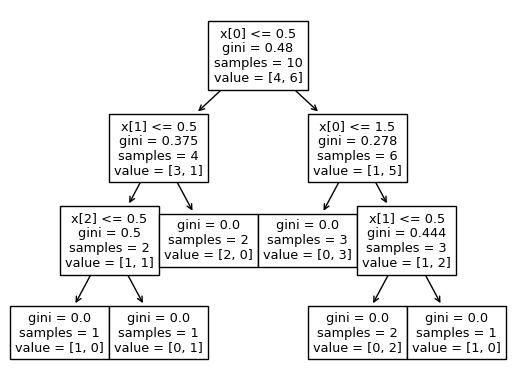

In [42]:
tree.plot_tree(model.fit(X_train, y_train))
plt.show()

# Excersize on Titanic data set


In [64]:
df= pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")

In [65]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
new_df = df[['Survived', 'Pclass', 'Sex', 'Age','Fare']]

In [67]:
new_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [68]:
new_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [69]:
#new_df.dropna(inplace=True)

In [70]:
new_df["Age"]= new_df["Age"].fillna(new_df["Age"].mean())

C:\Users\tejas\AppData\Local\Temp\ipykernel_2208\2188597689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Age"]= new_df["Age"].fillna(new_df["Age"].mean())


In [71]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [72]:
new_df["Sex"] = encode.fit_transform(new_df["Sex"])

C:\Users\tejas\AppData\Local\Temp\ipykernel_2208\1821693931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sex"] = encode.fit_transform(new_df["Sex"])


In [73]:
new_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [74]:
X = new_df.drop("Survived", axis=1)

In [75]:
y =new_df["Survived"]

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model = DecisionTreeClassifier(criterion='entropy', splitter='random')

In [85]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [86]:
model.score(X_test, y_test)

0.776536312849162